IBM Capstone Project

In [1]:
import pandas as pd
import numpy as np
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
! pip install geocoder
import geocoder

usage: conda-script.py [-h] [-V] command ...
conda-script.py: error: unrecognized arguments: # uncomment this line if you haven't completed the Foursquare API lab


Data 

In [3]:
df = pd.read_csv('zomato.csv',encoding='ISO-8859-1')
df.head()

Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM Megamall, Ortigas, Mandaluyong City   
4      SM Megamall, Ortigas, Mandaluyong City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   
2  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831  14.581404   
3  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475  14.585318   
4  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508  14.584450   

                           Cuisines  ...          Currency Has Table booking  \
0        French, Japanese, Desserts  ...  Botswana Pula(P)               Yes   
1                          Japanese  ...  Botswana Pula(P)               Yes   
2  Seafood, Asian, Filipino, Indian  ...  Botswana Pula(P)               Yes   
3                   Japanese, Sushi  ...  Botswana Pula(P)                No   
4                  Japanese, Korean  ...  Botswana Pula(P)               Yes   

  Has Online delivery Is delivering now Switch to order menu Price range  \
0                  No                No                   No           3   
1                  No                No                   No           3   
2                  No                No                   No           4   
3                  No                No                   No           4   
4                  No                No                   No           4   

   Aggregate rating  Rating color Rating text Votes  
0               4.8    Dark Green   Excellent   314  
1               4.5    Dark Green   Excellent   591  
2               4.4         Green   Very Good   270  
3               4.9    Dark Green   Excellent   365  
4               4.8    Dark Green   Excellent   229  

[5 rows x 21 columns]

In [4]:
df_india = df[df['Country Code'] == 1]
df_NDLS = df_india[df_india['City'] == 'New Delhi']
df_NDLS.reset_index(drop=True, inplace=True)
df_NDLS.head()

Restaurant ID  Restaurant Name  Country Code       City  \
0       18287358       Food Cloud             1  New Delhi   
1       18216944        Burger.in             1  New Delhi   
2         313333  Days of the Raj             1  New Delhi   
3       18384127   Dilli Ka Dhaba             1  New Delhi   
4            582        Govardhan             1  New Delhi   

                                             Address    Locality  \
0                              Aaya Nagar, New Delhi  Aaya Nagar   
1        84, Near Honda Showroom, Adchini, New Delhi     Adchini   
2  81/3, 1st Floor, Qutub Residency, Adchini, New...     Adchini   
3  66 A, Ground Floor, Sri Aurobindo Marg, Adchin...     Adchini   
4  84, Adjacent Hero Motor Bike Showroom, Main Me...     Adchini   

        Locality Verbose  Longitude   Latitude  \
0  Aaya Nagar, New Delhi   0.000000   0.000000   
1     Adchini, New Delhi  77.196923  28.535382   
2     Adchini, New Delhi  77.197475  28.535493   
3     Adchini, New Delhi  77.198033  28.537547   
4     Adchini, New Delhi  77.196924  28.535523   

                              Cuisines  ...            Currency  \
0                       Cuisine Varies  ...  Indian Rupees(Rs.)   
1                            Fast Food  ...  Indian Rupees(Rs.)   
2   North Indian, Seafood, Continental  ...  Indian Rupees(Rs.)   
3           South Indian, North Indian  ...  Indian Rupees(Rs.)   
4  South Indian, North Indian, Chinese  ...  Indian Rupees(Rs.)   

  Has Table booking Has Online delivery Is delivering now  \
0                No                  No                No   
1                No                 Yes                No   
2               Yes                 Yes                No   
3                No                  No                No   
4                No                 Yes                No   

  Switch to order menu Price range  Aggregate rating  Rating color  \
0                   No           2               0.0         White   
1                   No           1               3.2        Orange   
2                   No           3               3.4        Orange   
3                   No           2               2.6        Orange   
4                   No           2               3.4        Orange   

  Rating text Votes  
0   Not rated     2  
1     Average    46  
2     Average    45  
3     Average    11  
4     Average   238  

[5 rows x 21 columns]

In [5]:
df_Res= df_NDLS[df_NDLS.Longitude !=0.000000][['Restaurant Name','Locality','Longitude','Latitude','Cuisines','Aggregate rating','Rating text','Votes']]
df_Res = df_Res[df_Res['Aggregate rating'] !=0.0]
df_Res.head()

Restaurant Name Locality  Longitude   Latitude  \
1        Burger.in  Adchini  77.196923  28.535382   
2  Days of the Raj  Adchini  77.197475  28.535493   
3   Dilli Ka Dhaba  Adchini  77.198033  28.537547   
4        Govardhan  Adchini  77.196924  28.535523   
5   Mezbaan Grills  Adchini  77.198122  28.538134   

                              Cuisines  Aggregate rating Rating text  Votes  
1                            Fast Food               3.2     Average     46  
2   North Indian, Seafood, Continental               3.4     Average     45  
3           South Indian, North Indian               2.6     Average     11  
4  South Indian, North Indian, Chinese               3.4     Average    238  
5                              Mughlai               3.1     Average      8

Map

In [9]:
New_Delhi_Rest = folium.Map(location=[28.52, 77.25], zoom_start=15)

X = df_Res['Latitude']
Y = df_Res['Longitude']
Z = np.stack((X, Y), axis=1)

kmeans = KMeans(n_clusters=7, random_state=0).fit(Z)

clusters = kmeans.labels_
colors = ['red', 'green', 'blue', 'yellow','orange','purple','black']
df_Res ['Cluster'] = clusters

for latitude, longitude, Locality, cluster in zip(df_Res['Latitude'], df_Res['Longitude'], df_Res['Locality'], df_Res['Cluster']):
    label = folium.Popup(Locality, parse_html=True)
    folium.CircleMarker(
        [latitude, longitude],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.7).add_to(New_Delhi_Rest)  

New_Delhi_Rest

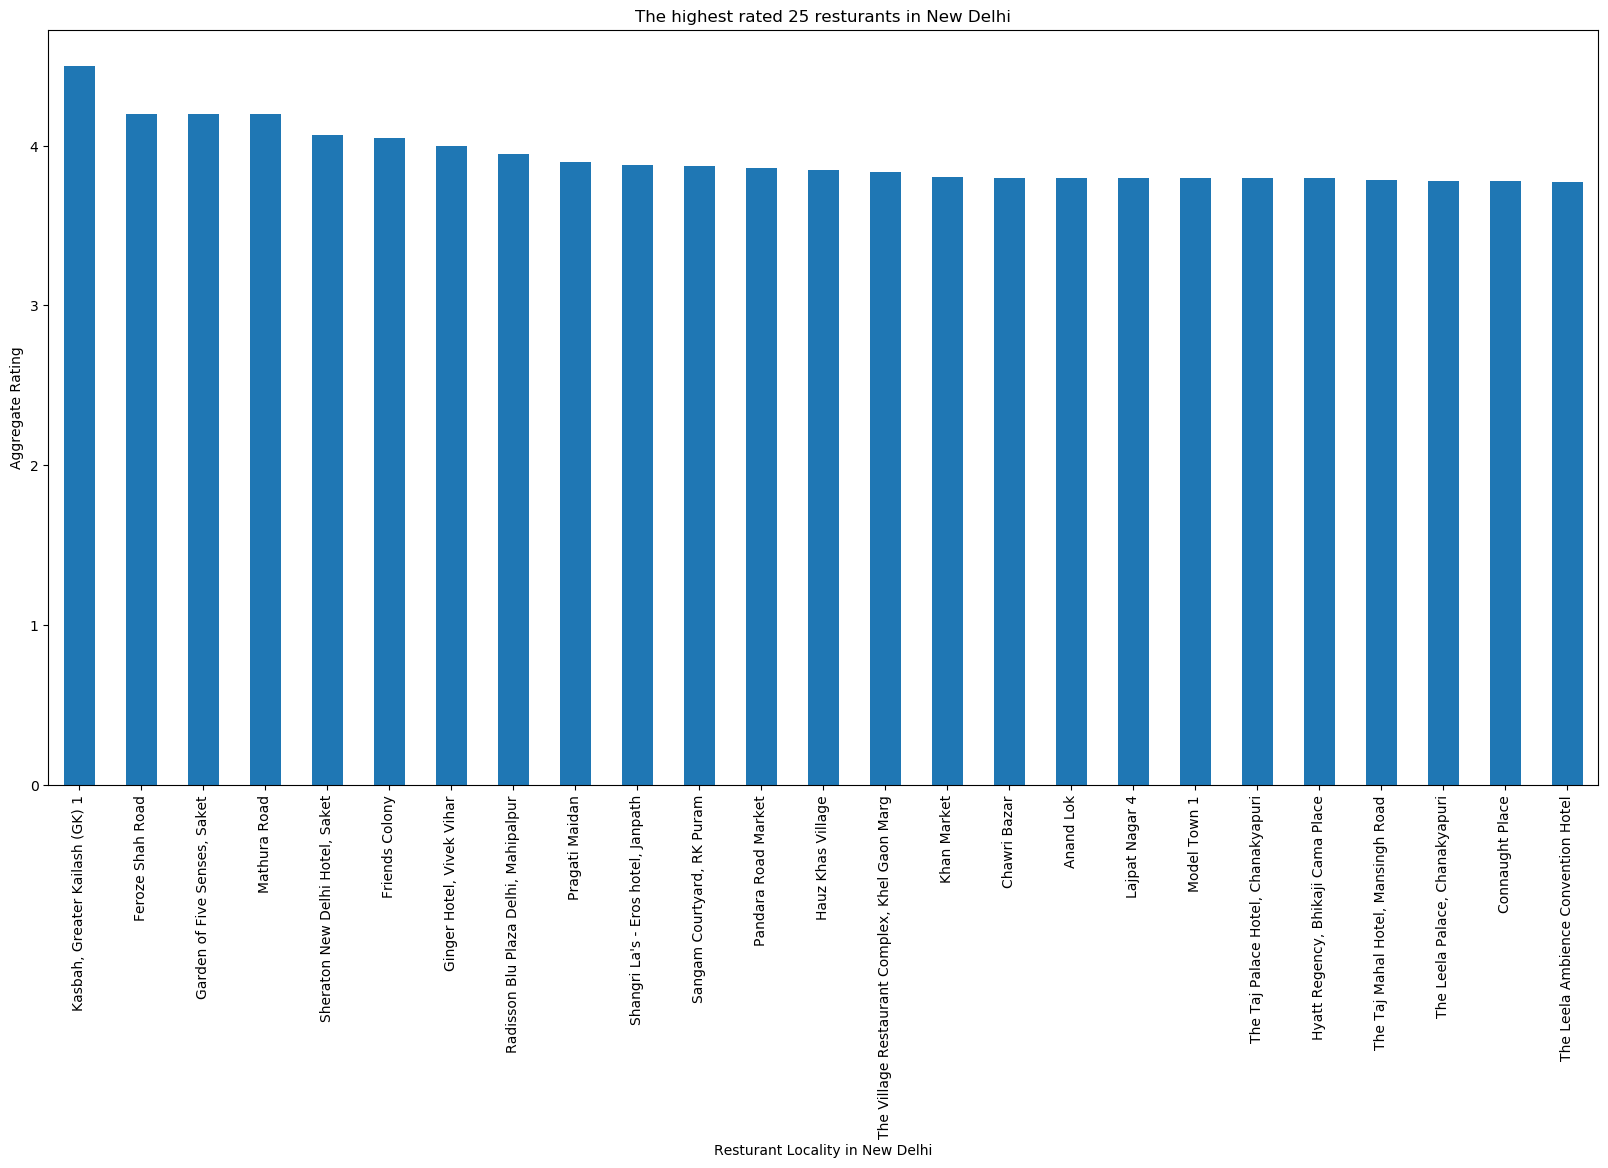

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10), dpi = 100)
# title
plt.title('The highest rated 25 resturants in New Delhi')
#On x-axis

#giving a bar plot
df_Res.groupby('Locality')['Aggregate rating'].mean().nlargest(25).plot(kind='bar')

plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
plt.ylabel('Aggregate Rating')
#displays the plot
plt.show()

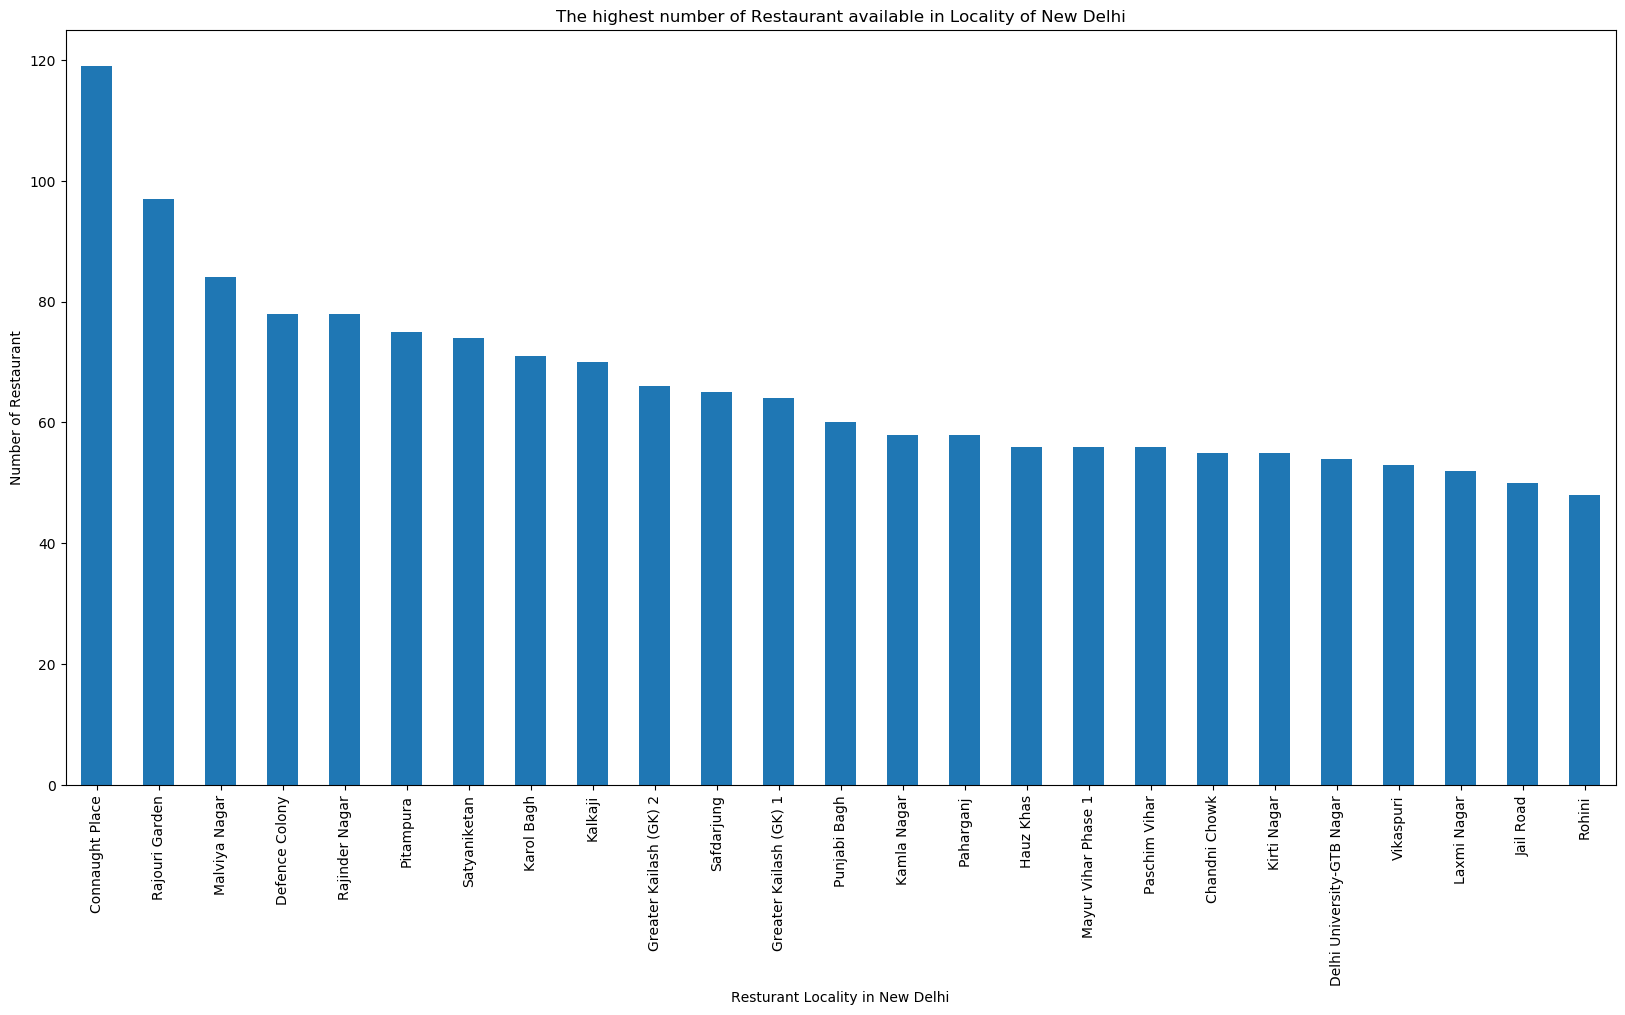

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10), dpi = 100)
# title
plt.title('The highest number of Restaurant available in Locality of New Delhi')
#On x-axis

#giving a bar plot
df_Res.groupby('Locality')['Restaurant Name'].count().nlargest(25).plot(kind='bar')

plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
plt.ylabel('Number of Restaurant')

#displays the plot
plt.show()

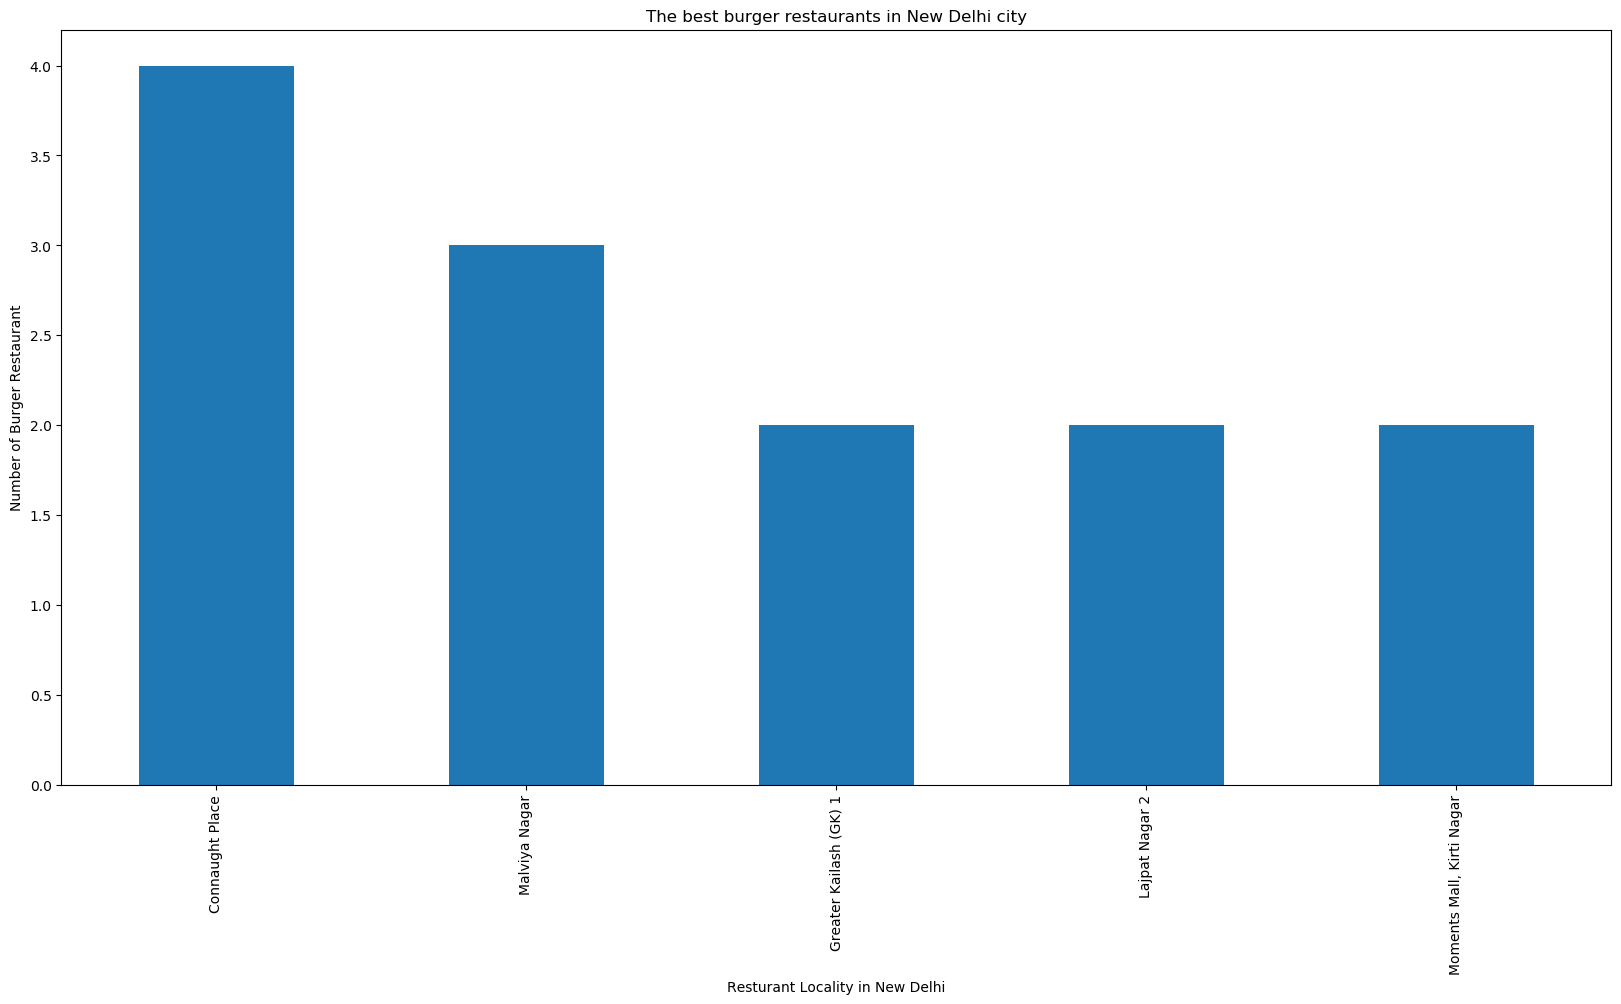

In [18]:
# Burger Restaurants
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10), dpi = 100)
# title
plt.title('The best burger restaurants in New Delhi city')
#On x-axis

#giving a bar plot
df_Res[df_Res['Cuisines'].str.startswith('Burger')].groupby('Locality')['Restaurant Name'].count().nlargest().plot(kind='bar')

plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
plt.ylabel('Number of Burger Restaurant')

#displays the plot
plt.show()

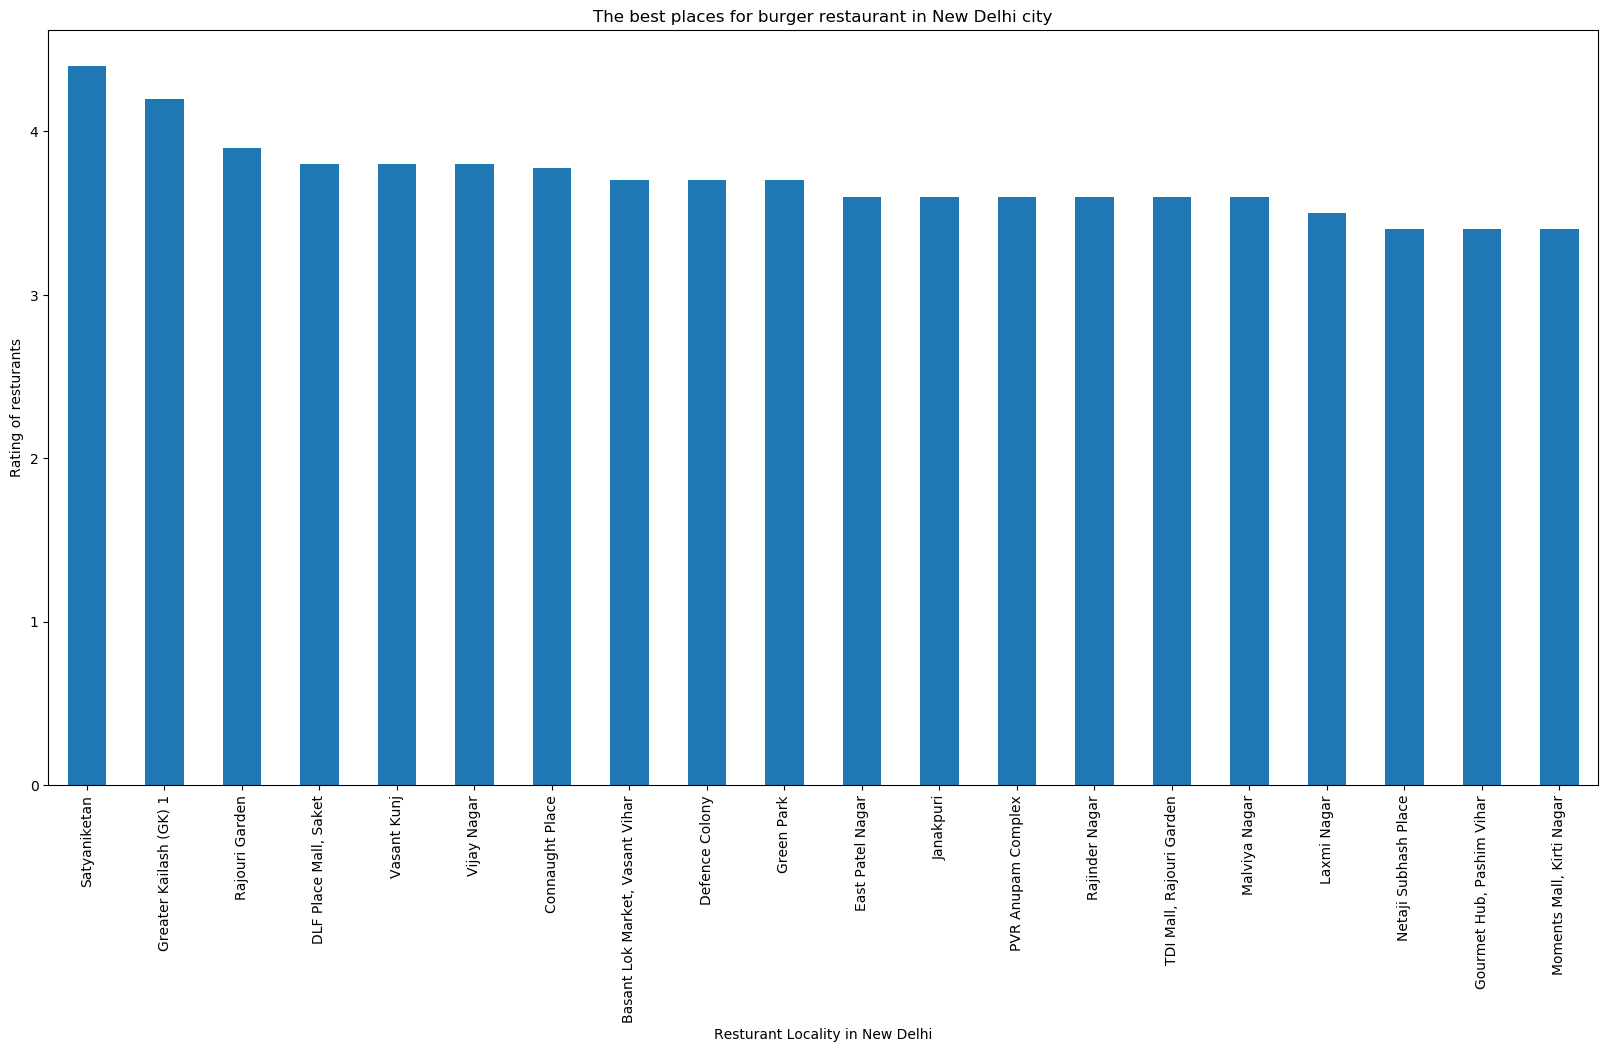

In [19]:
# Best Burger Restaurants
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10), dpi = 100)
# title
plt.title('The best places for burger restaurant in New Delhi city')
#On x-axis

#giving a bar plot
df_Res[df_Res['Cuisines'].str.startswith('Burger')].groupby('Locality')['Aggregate rating'].mean().nlargest(20).plot(kind='bar')

plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
plt.ylabel('Rating of resturants')

#displays the plot
plt.show()

In [24]:
df_Res_Loc =  df_Res.groupby('Locality').count()['Restaurant Name'].to_frame()
df_Res_rating= df_Res.groupby('Locality')['Aggregate rating'].mean().to_frame()
d_Cuisines = df_Res.groupby(['Locality'])['Cuisines'].agg(', '.join).reset_index()
d_R = df_Res.groupby(['Locality'])['Rating text'].unique().agg(', '.join).reset_index()
d_V = df_Res.groupby(['Locality'])['Votes'].sum().to_frame()
d_Lat = df_Res.groupby('Locality').mean()['Latitude'].to_frame()
d_Lng = df_Res.groupby('Locality').mean()['Longitude'].to_frame()
df_final = pd.merge(d_Lat,d_Lng,on='Locality').merge(df_Res_Loc, on='Locality').merge(d_Cuisines, on='Locality').merge(df_Res_rating,on ='Locality').merge(d_R, on ='Locality').merge(d_V, on ='Locality')
df_final = df_final[df_final['Aggregate rating'] != 0.000000]
df_final.columns =['Locality','Lat','Lng', 'No_of_Restaurant','Cusines', 'Agg_Rating','Comments' ,'No_of_Votes']
df_final.head()

Locality        Lat        Lng  No_of_Restaurant  \
0       ARSS Mall, Paschim Vihar  28.668945  77.101544                 1   
1                        Adchini  28.537063  77.197808                13   
2  Aditya Mega Mall, Karkardooma  28.656131  77.301266                 4   
3                       Aerocity  28.553077  77.104270                 2   
4  Aggarwal City Mall, Pitampura  28.690020  77.134650                 3   

                                             Cusines  Agg_Rating  \
0  North Indian, South Indian, Chinese, Mithai, F...    3.100000   
1  Fast Food, North Indian, Seafood, Continental,...    3.292308   
2  Finger Food, North Indian, Mughlai, Pizza, Fas...    3.275000   
3  Fast Food, Italian, Pizza, North Indian, Conti...    3.200000   
4  North Indian, Chinese, Street Food, Mithai, No...    3.033333   

                         Comments  No_of_Votes  
0                         Average          117  
1  Average, Good, Poor, Very Good         1560  
2                   Average, Good          434  
3                         Average           59  
4                         Average          126

In [26]:
# FS 
## Define Foursquare Credentials and Version
CLIENT_ID = 'ES3ZXR1ALGY0Q0YQVMG0RUMAO00WTUNG4K1C2JN5C2J0O1AZ' # Foursquare ID
CLIENT_SECRET = 'H3VNVPRCUTEX4NP23B4ANBLXWZKKIZ0VM4NKN0IQRYPYXPTW' # Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: ES3ZXR1ALGY0Q0YQVMG0RUMAO00WTUNG4K1C2JN5C2J0O1AZ
CLIENT_SECRET:H3VNVPRCUTEX4NP23B4ANBLXWZKKIZ0VM4NKN0IQRYPYXPTW


In [27]:
## create a function to repeat the same process to all the Locality in New Delhi

def getNearbyVenues(names, latitudes, longitudes, radius=500,LIMIT = 100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Locality', 
                  'Locality Latitude', 
                  'Locality Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [28]:
new_Delhi_venues = getNearbyVenues(names=df_final['Locality'],
                                   latitudes=df_final['Lat'],
                                   longitudes=df_final['Lng']
                                  )

ARSS Mall, Paschim Vihar
Adchini
Aditya Mega Mall, Karkardooma
Aerocity
Aggarwal City Mall, Pitampura
Aggarwal City Plaza, Rohini
Alaknanda
Ambience Mall, Vasant Kunj
Anand Lok
Anand Vihar
Andaz Delhi, Aerocity
Ansal Plaza Mall, Khel Gaon Marg
Asaf Ali Road
Ashok Vihar Phase 1
Ashok Vihar Phase 2
Ashok Vihar Phase 3
Barakhamba Road
Basant Lok Market, Vasant Vihar
Bellagio, Ashok Vihar Phase 2
Best Western Taurus Hotel, Mahipalpur
Bhikaji Cama Place
Chanakyapuri
Chander Nagar
Chandni Chowk
Chawri Bazar
Chhatarpur
Chittaranjan Park
City Centre Mall, Rohini
City Square Mall, Rajouri Garden
Civil Lines
Community Centre, New Friends Colony
Connaught Place
Crescent Square Mall, Rohini
Cross River Mall, Karkardooma
Crowne Plaza Hotel, Rohini
Crowne Plaza, Mayur Vihar Phase 1
D Mall, Netaji Subhash Place
DDA Market, Kalu Sarai, Hauz Khas
DLF City Centre Mall, Shalimar Bagh
DLF Emporio Mall, Vasant Kunj
DLF Place Mall, Saket
DLF Promenade Mall, Vasant Kunj
DLF South Square, Sarojini Nagar
Darya

In [29]:
new_Delhi_venues.head()

Locality  Locality Latitude  Locality Longitude  \
0  ARSS Mall, Paschim Vihar          28.668945           77.101544   
1  ARSS Mall, Paschim Vihar          28.668945           77.101544   
2  ARSS Mall, Paschim Vihar          28.668945           77.101544   
3  ARSS Mall, Paschim Vihar          28.668945           77.101544   
4  ARSS Mall, Paschim Vihar          28.668945           77.101544   

                         Venue  Venue Latitude  Venue Longitude  \
0                       Subway       28.669999        77.102546   
1                    Pizza Hut       28.670321        77.103853   
2              Café Coffee Day       28.670009        77.102480   
3  Baljeet's Amritsari Koolcha       28.665768        77.100481   
4                  Little Chef       28.670000        77.101459   

       Venue Category  
0      Sandwich Place  
1         Pizza Place  
2         Coffee Shop  
3   Indian Restaurant  
4  Chinese Restaurant

In [31]:
# one hot encoding
new_Delhi_onehot = pd.get_dummies(new_Delhi_venues[['Venue Category']], prefix="", prefix_sep="")

# add Locality column back to dataframe
new_Delhi_onehot['Locality'] = new_Delhi_venues['Locality'] 

# move Locality column to the first column
column_list = new_Delhi_onehot.columns.tolist()
column_number = int(column_list.index('Locality'))
column_list = [column_list[column_number]] + column_list[:column_number] + column_list[column_number+1:]
new_Delhi_onehot = new_Delhi_onehot[column_list]

new_Delhi_onehot.head()

Locality  ATM  Accessories Store  Afghan Restaurant  \
0  ARSS Mall, Paschim Vihar    0                  0                  0   
1  ARSS Mall, Paschim Vihar    0                  0                  0   
2  ARSS Mall, Paschim Vihar    0                  0                  0   
3  ARSS Mall, Paschim Vihar    0                  0                  0   
4  ARSS Mall, Paschim Vihar    0                  0                  0   

   African Restaurant  Airport  Airport Lounge  Airport Service  \
0                   0        0               0                0   
1                   0        0               0                0   
2                   0        0               0                0   
3                   0        0               0                0   
4                   0        0               0                0   

   Airport Terminal  American Restaurant  ...  Turkish Restaurant  \
0                 0                    0  ...                   0   
1                 0                    0  ...                   0   
2                 0                    0  ...                   0   
3                 0                    0  ...                   0   
4                 0                    0  ...                   0   

   Udupi Restaurant  Vegetarian / Vegan Restaurant  Vietnamese Restaurant  \
0                 0                              0                      0   
1                 0                              0                      0   
2                 0                              0                      0   
3                 0                              0                      0   
4                 0                              0                      0   

   Whisky Bar  Wine Bar  Wine Shop  Wings Joint  Women's Store  Yoga Studio  
0           0         0          0            0              0            0  
1           0         0          0            0              0            0  
2           0         0          0            0              0            0  
3           0         0          0            0              0            0  
4           0         0          0            0              0            0  

[5 rows x 228 columns]

In [32]:
New_Delhi_grouped = new_Delhi_onehot.groupby('Locality').mean().reset_index()
New_Delhi_grouped

Locality       ATM  Accessories Store  \
0          ARSS Mall, Paschim Vihar  0.090909           0.000000   
1                           Adchini  0.000000           0.000000   
2     Aditya Mega Mall, Karkardooma  0.000000           0.000000   
3                          Aerocity  0.000000           0.000000   
4     Aggarwal City Mall, Pitampura  0.000000           0.000000   
..                              ...       ...                ...   
233  West Gate Mall, Rajouri Garden  0.000000           0.000000   
234                West Patel Nagar  0.000000           0.000000   
235           Worldmark 1, Aerocity  0.000000           0.033333   
236                     Yusuf Sarai  0.000000           0.000000   
237        ibis New Delhi, Aerocity  0.000000           0.000000   

     Afghan Restaurant  African Restaurant  Airport  Airport Lounge  \
0                  0.0                 0.0      0.0        0.000000   
1                  0.0                 0.0      0.0        0.000000   
2                  0.0                 0.0      0.0        0.000000   
3                  0.0                 0.0      0.0        0.142857   
4                  0.0                 0.0      0.0        0.000000   
..                 ...                 ...      ...             ...   
233                0.0                 0.0      0.0        0.000000   
234                0.0                 0.0      0.0        0.000000   
235                0.0                 0.0      0.0        0.000000   
236                0.0                 0.0      0.0        0.000000   
237                0.0                 0.0      0.0        0.000000   

     Airport Service  Airport Terminal  American Restaurant  ...  \
0                0.0          0.000000             0.000000  ...   
1                0.0          0.000000             0.000000  ...   
2                0.0          0.000000             0.000000  ...   
3                0.0          0.142857             0.000000  ...   
4                0.0          0.000000             0.000000  ...   
..               ...               ...                  ...  ...   
233              0.0          0.000000             0.058824  ...   
234              0.0          0.000000             0.000000  ...   
235              0.0          0.000000             0.000000  ...   
236              0.0          0.000000             0.000000  ...   
237              0.0          0.000000             0.000000  ...   

     Turkish Restaurant  Udupi Restaurant  Vegetarian / Vegan Restaurant  \
0                   0.0               0.0                            0.0   
1                   0.0               0.0                            0.0   
2                   0.0               0.0                            0.0   
3                   0.0               0.0                            0.0   
4                   0.0               0.0                            0.0   
..                  ...               ...                            ...   
233                 0.0               0.0                            0.0   
234                 0.0               0.0                            0.0   
235                 0.0               0.0                            0.0   
236                 0.0               0.0                            0.0   
237                 0.0               0.0                            0.0   

     Vietnamese Restaurant  Whisky Bar  Wine Bar  Wine Shop  Wings Joint  \
0                      0.0         0.0       0.0        0.0          0.0   
1                      0.0         0.0       0.0        0.0          0.0   
2                      0.0         0.0       0.0        0.0          0.0   
3                      0.0         0.0       0.0        0.0          0.0   
4                      0.0         0.0       0.0        0.0          0.0   
..                     ...         ...       ...        ...          ...   
233                    0.0         0.0       0.0        0.0          0.0   
234                

In [37]:
## First, write a function to sort the venues in descending order.

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Locality']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
Locality_venues_sorted = pd.DataFrame(columns=columns)
Locality_venues_sorted['Locality'] = New_Delhi_grouped['Locality']

for ind in np.arange(New_Delhi_grouped.shape[0]):
    Locality_venues_sorted.iloc[ind, 1:] = return_most_common_venues(New_Delhi_grouped.iloc[ind, :], num_top_venues)

Locality_venues_sorted

Locality 1st Most Common Venue  \
0          ARSS Mall, Paschim Vihar     Indian Restaurant   
1                           Adchini                  Café   
2     Aditya Mega Mall, Karkardooma           Pizza Place   
3                          Aerocity                 Hotel   
4     Aggarwal City Mall, Pitampura     Indian Restaurant   
..                              ...                   ...   
233  West Gate Mall, Rajouri Garden  Fast Food Restaurant   
234                West Patel Nagar  Gym / Fitness Center   
235           Worldmark 1, Aerocity                 Hotel   
236                     Yusuf Sarai     Indian Restaurant   
237        ibis New Delhi, Aerocity                 Hotel   

    2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
0                  Bakery                   Gym                Market   
1                     Pub      Parsi Restaurant                Lounge   
2       Indian Restaurant         Shopping Mall             Multiplex   
3             Coffee Shop  Fast Food Restaurant   Rental Car Location   
4        Department Store      Business Service           Pizza Place   
..                    ...                   ...                   ...   
233            Restaurant             Multiplex                  Café   
234           Pizza Place     Electronics Store         Metro Station   
235       Bed & Breakfast             Hotel Bar     Indian Restaurant   
236    Chinese Restaurant           Coffee Shop                   Bar   
237             Hotel Bar     Indian Restaurant           Coffee Shop   

              5th Most Common Venue 6th Most Common Venue  \
0    Multicuisine Indian Restaurant           Coffee Shop   
1                 Indian Restaurant            Food Court   
2                             Hotel                  Café   
3                    Airport Lounge      Airport Terminal   
4                     Deli / Bodega          Cupcake Shop   
..                              ...                   ...   
233                     Pizza Place         Shopping Mall   
234                           Hotel             Juice Bar   
235                     Coffee Shop   Japanese Restaurant   
236                Asian Restaurant          Dessert Shop   
237              Punjabi Restaurant       Bed & Breakfast   

    7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
0      Chinese Restaurant        Sandwich Place                   ATM   
1              Food Truck     Food & Drink Shop                  Food   
2             Event Space            Food Court     Food & Drink Shop   
3                    Farm     Fish & Chips Shop           Flea Market   
4     Fried Chicken Joint     French Restaurant            Food Truck   
..                    ...                   ...                   ...   
233            Hookah Bar                Garden          Dessert Shop   
234           Flea Market                  Farm  Fast Food Restaurant   
235   Rental Car Location   Dumpling Restaurant                Bakery   
236   Japanese Restaurant                 Hotel                  Park   
237                   Bar                Bakery                Lounge   

    10th Most Common Venue  
0              Pizza Place  
1              Event Space  
2                     Food  
3              Flower Shop  
4               Food Court  
..                     ...  
233      Indian Restaurant  
234      Fish & Chips Shop  
235                    Spa  
236      Korean Restaurant  
237                    Spa  

[238 rows x 11 columns]

In [45]:
## Cluster Locality
## Run k-means to cluster the Locality into 5 clusters.

# set number of clusters
kclusters = 5

New_Delhi_clustering = New_Delhi_grouped.drop('Locality', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(New_Delhi_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 
kmeans.labels_.shape

(238,)

In [46]:
# add clustering labels
New_Delhi_merged = df_final.head(238)
New_Delhi_merged['Cluster Labels'] = kmeans.labels_

# merge New_Delhi_grouped with df_Chinese to add latitude/longitude for each Locality
New_Delhi_merged = New_Delhi_merged.join(Locality_venues_sorted.set_index('Locality'), on='Locality')

New_Delhi_merged.head()

C:\Users\firat\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Locality        Lat        Lng  No_of_Restaurant  \
0       ARSS Mall, Paschim Vihar  28.668945  77.101544                 1   
1                        Adchini  28.537063  77.197808                13   
2  Aditya Mega Mall, Karkardooma  28.656131  77.301266                 4   
3                       Aerocity  28.553077  77.104270                 2   
4  Aggarwal City Mall, Pitampura  28.690020  77.134650                 3   

                                             Cusines  Agg_Rating  \
0  North Indian, South Indian, Chinese, Mithai, F...    3.100000   
1  Fast Food, North Indian, Seafood, Continental,...    3.292308   
2  Finger Food, North Indian, Mughlai, Pizza, Fas...    3.275000   
3  Fast Food, Italian, Pizza, North Indian, Conti...    3.200000   
4  North Indian, Chinese, Street Food, Mithai, No...    3.033333   

                         Comments  No_of_Votes  Cluster Labels  \
0                         Average          117               4   
1  Average, Good, Poor, Very Good         1560               0   
2                   Average, Good          434               3   
3                         Average           59               1   
4                         Average          126               3   

  1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
0     Indian Restaurant                Bakery                   Gym   
1                  Café                   Pub      Parsi Restaurant   
2           Pizza Place     Indian Restaurant         Shopping Mall   
3                 Hotel           Coffee Shop  Fast Food Restaurant   
4     Indian Restaurant      Department Store      Business Service   

  4th Most Common Venue           5th Most Common Venue 6th Most Common Venue  \
0                Market  Multicuisine Indian Restaurant           Coffee Shop   
1                Lounge               Indian Restaurant            Food Court   
2             Multiplex                           Hotel                  Café   
3   Rental Car Location                  Airport Lounge      Airport Terminal   
4           Pizza Place                   Deli / Bodega          Cupcake Shop   

  7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
0    Chinese Restaurant        Sandwich Place                   ATM   
1            Food Truck     Food & Drink Shop                  Food   
2           Event Space            Food Court     Food & Drink Shop   
3                  Farm     Fish & Chips Shop           Flea Market   
4   Fried Chicken Joint     French Restaurant            Food Truck   

  10th Most Common Venue  
0            Pizza Place  
1            Event Space  
2                   Food  
3            Flower Shop  
4             Food Court

In [47]:
# create final map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=20)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
#colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
#rainbow = [colors.rgb2hex(i) for i in colors_array]
colors = ['red', 'green', 'blue', 'yellow','orange']

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(New_Delhi_merged['Lat'], New_Delhi_merged['Lng'], New_Delhi_merged['Locality'], New_Delhi_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

# Conclusion

Connaught Place, Malviya Nagar, Greater Kailash are the best neighborhoods for burger restaurants.

Satyaniketan, Greater Kailash, Rajouri Garden have the best burher places.

Cannaught place, Rajouri garden, Malviya nagar are the best places for edible person.

Greater kailash, Feroze shah road, Saket have best resturants in New Delhi.